In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from statistics import mean


In [8]:
songs = pd.read_csv("songsWithLyrics.csv")
wordCt = pd.read_json("totalCount.json", typ='series')
uniqueCt = pd.read_json("totalCountNoDupes.json", typ='series')

In [123]:
electionYrs = [1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
americaWords = ['america', 'patriot', 'republic', 'democ', 'president', 'congress', 'vote', 'govern', 'politi', 
                'campaign', 'federa', 'ballot', 'candidate', ' election', ' liber', 'conserv', 'majority', 'minorit', 
                'corrupt', ' law ', 'bureau', 'equal', 'nominat', ' media ', 'amend', 'veto ', ' rights', 'freed', 'societ',
               'civi', ' nation']


In [12]:
songs.WeekID = pd.to_datetime(songs.WeekID, errors='ignore', infer_datetime_format=True)

In [124]:
politicsCounts = {}

for i in range(1958, 2022):
    politicsCounts[i] = 0

for index, row in songs.iterrows():
    tempYr = songs.loc[index, 'WeekID'].year
    tempLyrics = songs.loc[index, 'lyrics']
    """
    for word in americaWords:
        if word in tempLyrics:
            politicsCounts[tempYr] = politicsCounts[tempYr] + 1
    """
    
    found = False
    for word in americaWords:
        if not found:
            if word in tempLyrics:
                found = True
    if found:
        politicsCounts[tempYr] = politicsCounts[tempYr] + 1
    

print(politicsCounts)
    

{1958: 4, 1959: 5, 1960: 9, 1961: 11, 1962: 11, 1963: 5, 1964: 11, 1965: 16, 1966: 18, 1967: 15, 1968: 16, 1969: 26, 1970: 27, 1971: 30, 1972: 24, 1973: 14, 1974: 23, 1975: 17, 1976: 19, 1977: 17, 1978: 12, 1979: 13, 1980: 17, 1981: 18, 1982: 26, 1983: 20, 1984: 15, 1985: 19, 1986: 24, 1987: 16, 1988: 13, 1989: 18, 1990: 14, 1991: 6, 1992: 19, 1993: 16, 1994: 15, 1995: 15, 1996: 22, 1997: 15, 1998: 15, 1999: 16, 2000: 22, 2001: 14, 2002: 14, 2003: 18, 2004: 20, 2005: 16, 2006: 25, 2007: 15, 2008: 20, 2009: 18, 2010: 23, 2011: 23, 2012: 14, 2013: 18, 2014: 15, 2015: 19, 2016: 19, 2017: 25, 2018: 37, 2019: 1, 2020: 2, 2021: 1}


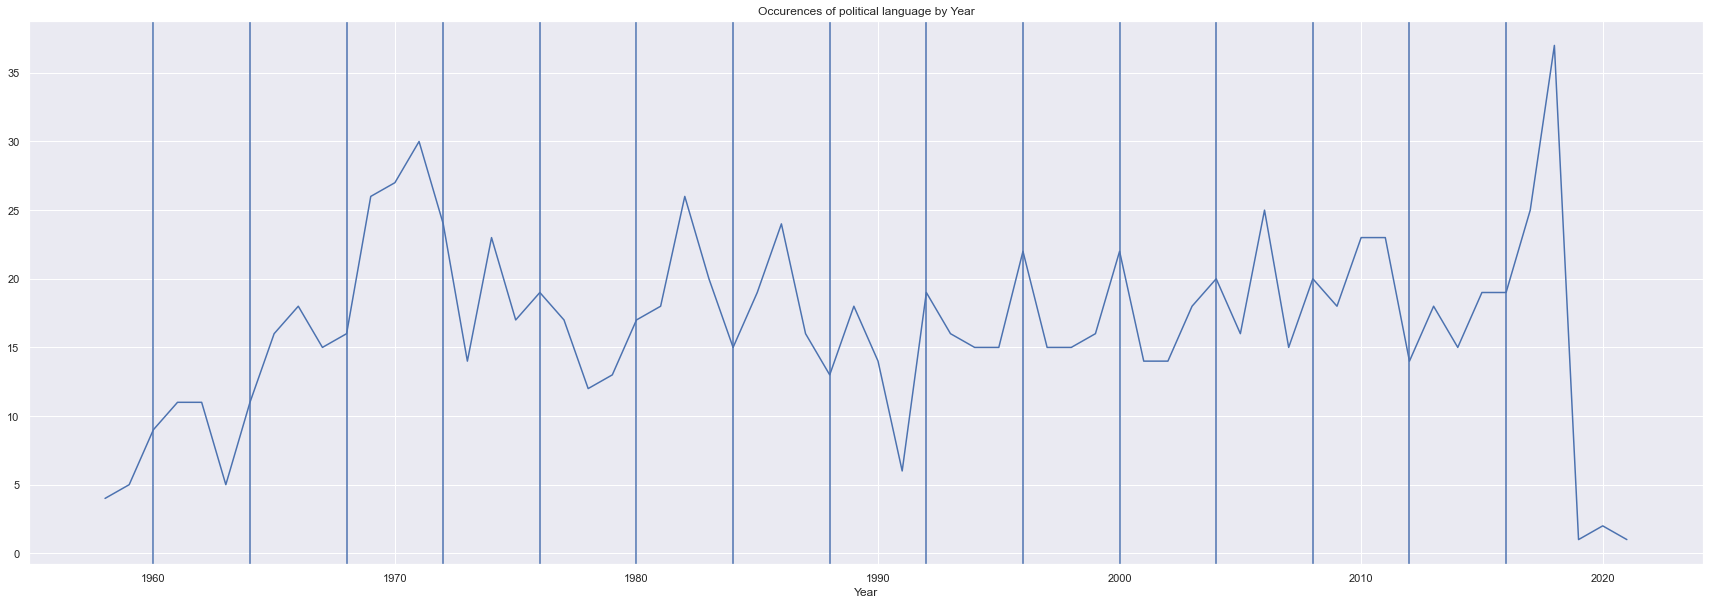

In [126]:
sns.lineplot(x=politicsCounts.keys(), y=politicsCounts.values()).set(title="Occurences of political language by Year")
for yr in electionYrs:
    plt.axvline(yr)
sns.set(rc={"figure.figsize": (30,10)})
plt.xlabel("Year")
plt.ylabel("")
plt.show()


In [120]:
binaryElec = []
for i in range(1958, 2022):
    if i in electionYrs:
        binaryElec.append(1)
    else:
        binaryElec.append(0)
        
print(binaryElec)

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


<AxesSubplot:>

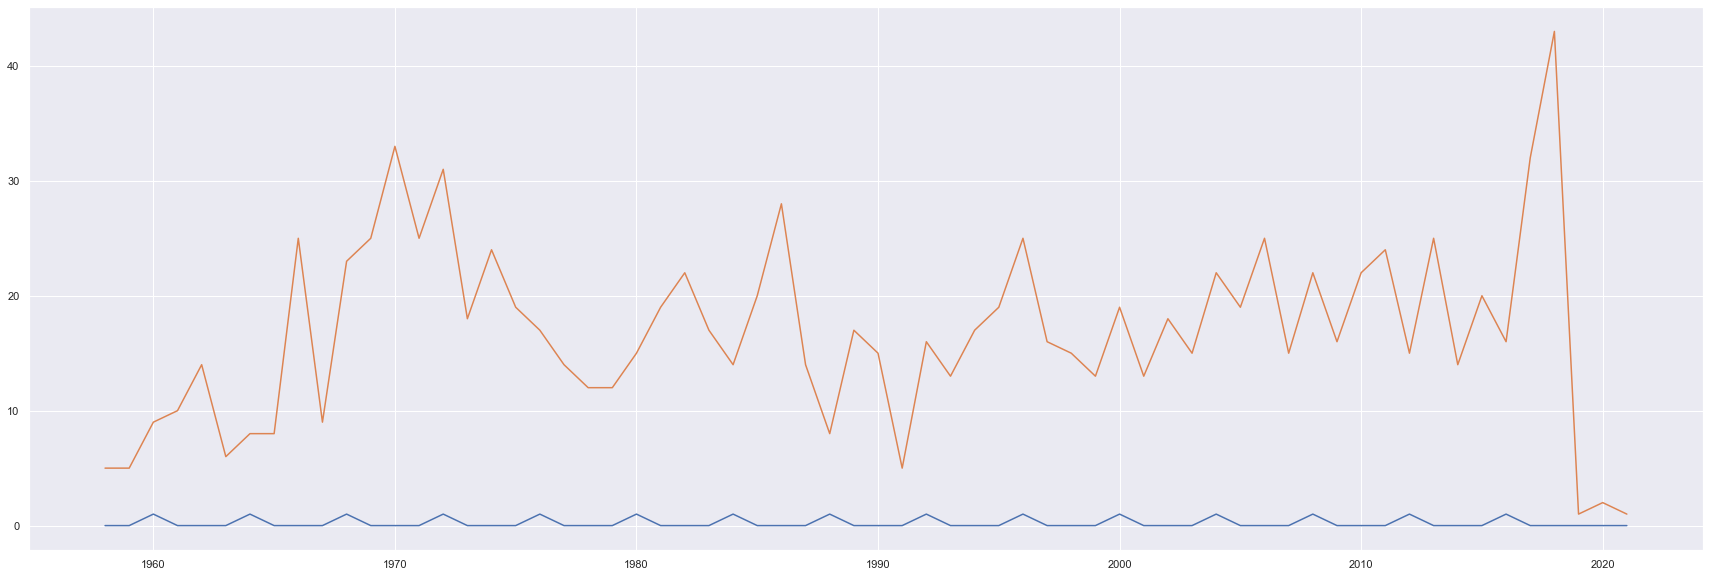

In [109]:
sns.lineplot(x=politicsCounts.keys(), y=binaryElec)
sns.lineplot(x=politicsCounts.keys(), y=politicsCounts.values())


In [121]:
meanSongs = mean(politicsCounts.values())
valuesList = list(politicsCounts.values())
aboveAvgSongs = []
for i in range(1958, 2022):
    if valuesList[i - 1958] >= meanSongs:
        aboveAvgSongs.append(1)
    else:
        aboveAvgSongs.append(0)

print(aboveAvgSongs)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0]


<AxesSubplot:>

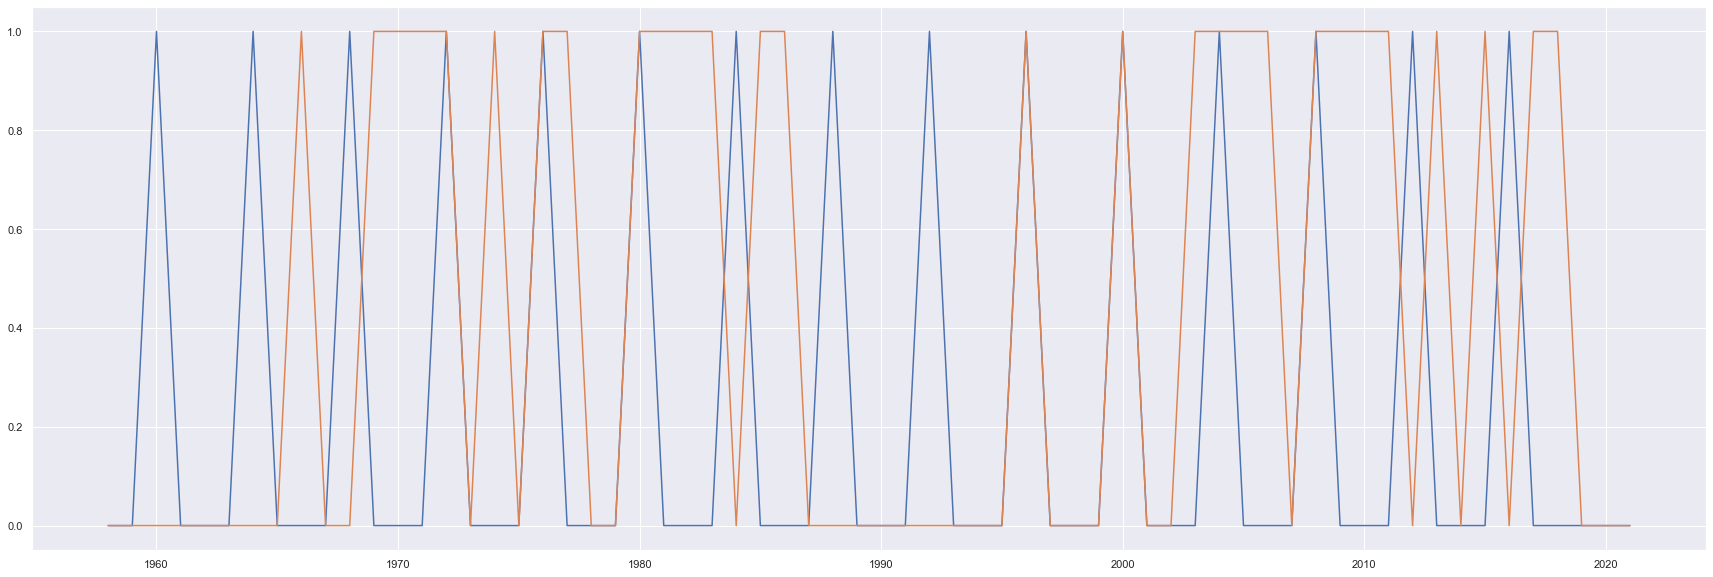

In [122]:
sns.lineplot(x=politicsCounts.keys(), y=binaryElec)
sns.lineplot(x=politicsCounts.keys(), y=aboveAvgSongs)


In [84]:
np.corrcoef(binaryElec, aboveAvgSongs)

array([[ 1.       , -0.1501411],
       [-0.1501411,  1.       ]])

In [86]:
np.corrcoef(binaryElec, list(politicsCounts.values()))

array([[ 1.        , -0.05144945],
       [-0.05144945,  1.        ]])